# JAYITHI GAVVA-FINAL PROJECT-PNEUMONIA DETECTION MODEL USING CNN'S

## INTRODUCTION:

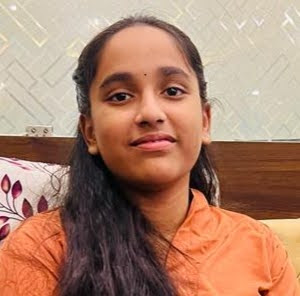


Hi, I’m Jayithi, a 14-year-old student from India going into 10th grade.

FUN FACTS ABOUT ME:
- I have a serious love for reading and debating.
- My favorite book is *The Inheritance Games*. If you haven’t read it yet, you’re missing out!
- I absolutely love my name. Everyone likes their name, but I really adore mine. “Jayithi” means “the one who always wins” in Sanskrit.
- I once dreamed of being a doctor, but now I’m all about computer science. I’ve mixed my childhood dreams with my current passions into one epic project! So after learning a bit of Scratch, a lot of Java and a bit of Python, I am here.

## MY PROJECT

My project focuses on developing an image classification model using Python to detect pneumonia from chest X-ray images. Pneumonia is a severe lung infection that can be life-threatening, especially for young children and the elderly. Early detection is crucial for effective treatment, and automated image classification can significantly aid in this process. Using CNN's, this project aims to create an efficient and accurate model to assist in the diagnosis of pneumonia. The dataset-https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

I have included one of my attempt where I made a model but it only had a 55 % accuracy, So I think this project was not only about me creating a model but about me trying to improve upon stuff and research a lot. And I mean a lot. I am quite happy with how my project turned out at last

---

In class, I learned some really useful things that I’ve put into practice:

- **Solving Machine Learning Problems**: I figured out how to tackle machine learning challenges and build models, which is a key part of my project.

- **Using Seaborn for Data Visualization**: I got the hang of using Seaborn to visualize data, which has been great for showing and understanding my data better.
- **Making Jupyter Notebooks Look Good**: I learned how to create neat and attractive Jupyter notebooks and how to format my projects properly. It might seem silly, but it really helps in presenting my work well.




This source https://github.com/AMoazeni/Machine-Learning-Image-Classification/blob/master/Jupyter%20Notebook/ML%20-%20Image%20Recognition.ipynb, sent by Professor JoJo was immensely helpful.


---

## STEP 1: IMPORTING LIBRARIES

In [1]:
# Importing the libraries and packages
import numpy as np
# 'Sequential' library used to Initialize NN as sequence of layers (Alternative to Graph initialization)
from tensorflow.keras.models import Sequential
# 'Conv2D' for 1st step of adding convolution layers to images ('Conv3D' for videos with time as 3rd dimension)
from tensorflow.keras.layers import Conv2D
# 'MaxPooling2D' step 2 for pooling of max values from Convolution Layers
from tensorflow.keras.layers import MaxPooling2D
# 'Flatten' Pooled Layers for step 3
from tensorflow.keras.layers import Flatten
# 'Dense' for fully connected layers that feed into classic ANN
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### **numpy**
- A fundamental library for numerical computations in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is widely used for scientific computing and data analysis.

### **tensorflow.keras.models**
- Part of TensorFlow's high-level Keras API, this module includes tools for building and managing neural network models. It provides the `Sequential` model class for linear stacks of layers and methods for loading and saving models.

### **tensorflow.keras.layers**
- Contains layers for building neural networks, such as convolutional layers, pooling layers, and dense layers. These layers are essential for defining the architecture of a model, enabling various types of data processing and feature extraction.

### **tensorflow.keras.preprocessing.image**
- Provides utilities for loading and preprocessing images, making it easier to work with image data in machine learning tasks. This includes functions for image augmentation and transformations.

### **sklearn.metrics**
- A module in Scikit-learn that offers functions for evaluating the performance of machine learning models. It includes metrics for classification and regression tasks, such as accuracy, precision, recall, and F1 score, as well as tools for generating confusion matrices.

### **matplotlib.pyplot**
- A plotting library used for creating static, animated, and interactive visualizations in Python. It provides functions for creating a wide range of plots and charts, including line plots, scatter plots, histograms, and more.

### **seaborn**
-  Built on top of Matplotlib, Seaborn is a data visualization library that provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the creation of complex visualizations with built-in themes and color palettes.

---

## STEP 2: DATA AUGMENTATION AND PREPROCESSING FOR IMAGE CLASSIFICATION

In this code, I'm setting up data augmentation and preprocessing for my image classification project using Convolutional Neural Networks (CNNs). I’m using the `ImageDataGenerator` class from Keras to enhance my training dataset and help prevent overfitting by applying random transformations to the images.

For the training dataset, I'm applying several augmentations: rescaling the images, adding shear transformations, zooming, and performing horizontal flips. These augmentations increase the diversity of the training data by creating variations of the images, which helps my model generalize better. The test and validation datasets are only rescaled because they are used for evaluating model performance and should remain unchanged.

I'm using the `flow_from_directory` method to load images from my directories and prepare them for training, testing, and validation. I've set the target image size to 64x64 pixels and a batch size of 32, which determines how many images are processed in each iteration during model training. This setup helps ensure that my CNN model receives a well-processed and augmented set of images for effective learning and evaluation.

---

DIFFERENCE BETWEEN MY EARLIER CODE AND NOW:

In this updated code, I made several improvements to enhance data preprocessing and augmentation. Firstly, I expanded the set of augmentations applied to the training data. Along with the previous shear and zoom transformations, I now include width and height shifts, which help introduce more variability into the dataset. This broader range of augmentations is designed to improve model robustness and reduce overfitting. 

Additionally, I explicitly set up data generators for training and test data, ensuring that the augmentation is only applied to the training set and the test set is simply rescaled. I also incorporated a visualization step to confirm that the augmentations are being applied correctly.

In [2]:
# Create random transformation from Data to increase Dataset and prevent overfitting
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# 'batch_size' is the number of images that go through the CNN every weight update cycle
# Increase 'target_size' to improve model accuracy 
training_set = train_datagen.flow_from_directory('F:\\pneumonia\\chest_xray\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('F:\\pneumonia\\chest_xray\\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
validation_set = val_datagen.flow_from_directory('F:\\pneumonia\\chest_xray\\val',
                                            target_size=(64, 64), 
                                            batch_size=32,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## STEP 3: PLOTTING A FEW IMAGES TO SEE IF THE PIPELINE IS WORKING

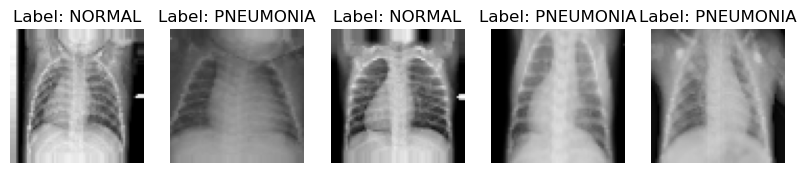

In [3]:
# Function to plot images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {class_names[int(labels[i])]}')#Ensuring that label is integer
        plt.axis('off')
    plt.show()

# Get a batch of images from the training set
batch = next(training_set)  # Get the next batch of images
images, labels = batch[0], batch[1]  # Extract images and labels
# I was getting TypeError: list indices must be integers or slices, not numpy.float32. So I added astype=int, to remove that
# Convert labels to integers
labels = np.argmax(labels, axis=1) if labels.ndim > 1 else labels.astype(int)

# Get class names
class_names = list(training_set.class_indices.keys())

# Plot a few random images from the batch
indices = np.random.choice(len(images), size=5, replace=False)  # Select 5 random indices
selected_images = [images[i] for i in indices]
selected_labels = [labels[i] for i in indices]

plot_images(selected_images, selected_labels, class_names)


## STEP 4: BUILDING THE MODEL

### Building and Compiling the CNN Model

In my final code, I begin by initializing a `Sequential` model. This model serves as the foundation for adding layers in a linear stack. I start by adding a convolutional layer with 32 filters and a kernel size of `(3, 3)`. This layer uses the ReLU activation function and is set up to process input images of size `(64, 64, 3)`. Following this, I include a max pooling layer with a pool size of `(2, 2)` to downsample the feature maps and reduce their spatial dimensions.

Next, I add another convolutional layer with 32 filters and the same kernel size, followed by another max pooling layer. This helps the model to learn and extract more features while keeping the spatial structure intact. After the convolutional and pooling layers, I flatten the output to convert the multidimensional feature maps into a one-dimensional vector, making it suitable for input into the fully connected layers.

I then add a dense layer with 128 units and ReLU activation. This layer introduces non-linearity and allows the model to learn complex patterns in the data. Following this, I add a final dense layer with a single unit and a sigmoid activation function. This output layer is designed for binary classification, producing a probability score that indicates the likelihood of the image belonging to the positive class.

To compile the model, I use the Adam optimizer, which helps adjust the learning rate during training for better convergence. I choose binary cross-entropy as the loss function, which is appropriate for binary classification tasks. Accuracy is specified as the metric to monitor, ensuring that the model's performance can be evaluated during training. Finally, I print the model summary to review the architecture and confirm that the setup is correct. This configuration prepares the CNN to be trained on image data, enabling it to learn and make predictions based on the features extracted from the images.

---

In my final code, I made several adjustments to the CNN architecture compared to the initial version. I changed the input shape from (150, 150, 3) to (64, 64, 3), which works with smaller images. I simplified the convolutional layers by using only 32 filters in both layers, whereas the initial code used increasing filter sizes of 32, 64, and 128. I also removed the dropout layer and reduced the dense layer from 512 units to 128 units, focusing on a more streamlined network. Despite these changes, I kept the same pooling strategy and compilation settings.

In [4]:
# Calling my model 'model'
model = Sequential()
# Step 1 - Convolution
# Apply a method 'add' on the object 'model'
# Filter = Feature Detector = Feature Kernel
# 'Conv2D' (Number of Filters, (Filter Row, Filter Column), input shape of inputs = (3 color channels, 64x64 -> 256x256 dimension of 2D array in each channel))
# Start with 32 filters, work your way up to 64 -> 128 -> 256
# 'input_shape' needs all picture inputs to be the same shape and format (2D array for B&W, 3D for Color images with each 2D array channel being Blue/Green/Red)
# 'input_shape' parameter shape matters (3,64,64) vs (64,64,3)
# 'Relu' Rectifier Activation Function used to get rid of -ve pixel values and increase non-linearity
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
# Reduces the size of the Feature Map by half (eg. 5x5 turns into 3x3 or 8x8 turns into 4x4)
# Preserves Spatial Structure and performance of model while reducing computation time
# 'pool_size' at least needs to be 2x2 to preserve Spatial Structure information (context around individual pixels)
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolution layer to improve performance
# Only need 'input_shape' for Input Layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
# Take all the Pooled Feature Maps and put them into one huge single Vector that will input into a classic NN
model.add(Flatten())

# Step 4 - Full connection
# Add some fully connected hidden layers (start with a number of Node between input and output layers)
# [Input Nodes(huge) - Output Nodes (2: Cat or Dog)] / 2 = ~128?...
# 'Activation' function makes sure relevant Nodes get a stronger vote or no vote
model.add(Dense(units = 128, activation = 'relu'))
# Add final Output Layer with binary options
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
# 'adam' Stochastic Gradient Descent optimizer
# 'loss' function. Logarithmic loss for 2 categories use 'binary_crossentropy' and 'categorical_crossentropy' for more objects
# 'metric' is the a performance metric
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\Tanish Reddy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## STEP 5: TRAINING THE MODEL

In this code, I’m training my CNN model using the `fit` method. First, I specify `training_set` as the source of the training data. This generator will provide batches of images and labels for the model to learn from during training. The `steps_per_epoch` parameter is set to 550, which means the model will process 550 batches of data in each epoch. This number is based on my dataset and batch size, and it helps define how many batches make up a single epoch.

I’ve also set the number of epochs to 10, which means the model will go through the entire training dataset 10 times. This is the total number of times the model will learn from the data before stopping. For validation, I use `validation_set` to provide data for evaluating the model’s performance during training. The `validation_steps` parameter is set to 2000, indicating that the model will evaluate 2000 batches from the validation data after each epoch. This helps me monitor how well the model is performing on unseen data and ensures that it’s generalizing well beyond the training set.

---

In my final code, I made some tweaks to how I train the model. Instead of dynamically calculating the number of steps per epoch and validation steps based on the size of my data and batch size, I’ve set them to fixed numbers: 550 for steps_per_epoch and 2000 for validation_steps. This change makes things a bit simpler, but I need to make sure these numbers fit well with my dataset and batch size. I’m still using the same number of epochs—10—so that part remains consistent. Overall, these adjustments help streamline the training process while reflecting the updates I made to my data generators and model setup.

In [5]:
history = model.fit(training_set,
                         steps_per_epoch = 550,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 2000)

Epoch 1/10


c:\Users\Tanish Reddy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/550 ━━━━━━━━━━━━━━━━━━━━ 7:19 1s/step - accuracy: 0.7894 - loss: 0.5026

c:\Users\Tanish Reddy\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


550/550 ━━━━━━━━━━━━━━━━━━━━ 197s 337ms/step - accuracy: 0.8250 - loss: 0.4117 - val_accuracy: 0.7500 - val_loss: 0.5014
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 126s 216ms/step - accuracy: 0.8974 - loss: 0.2451 - val_accuracy: 0.6875 - val_loss: 0.5109
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 155s 269ms/step - accuracy: 0.9149 - loss: 0.2101 - val_accuracy: 0.6250 - val_loss: 0.6539
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 466s 834ms/step - accuracy: 0.9197 - loss: 0.1934 - val_accuracy: 0.7500 - val_loss: 0.5742
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 160s 272ms/step - accuracy: 0.9317 - loss: 0.1710 - val_accuracy: 0.6875 - val_loss: 0.6275
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 161s 279ms/step - accuracy: 0.9372 - loss: 0.1575 - val_accuracy: 0.9375 - val_loss: 0.3364
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 167s 290ms/step - accuracy: 0.9411 - loss: 0.1517 - val_accuracy: 0.6250 - val_loss: 0.7186
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 124s 210ms/step - accuracy: 0.9428 - loss: 0.14

## STEP 6: PLOTTING TRAINING AND VALIDATION ACCURACY AND LOSS VALUES

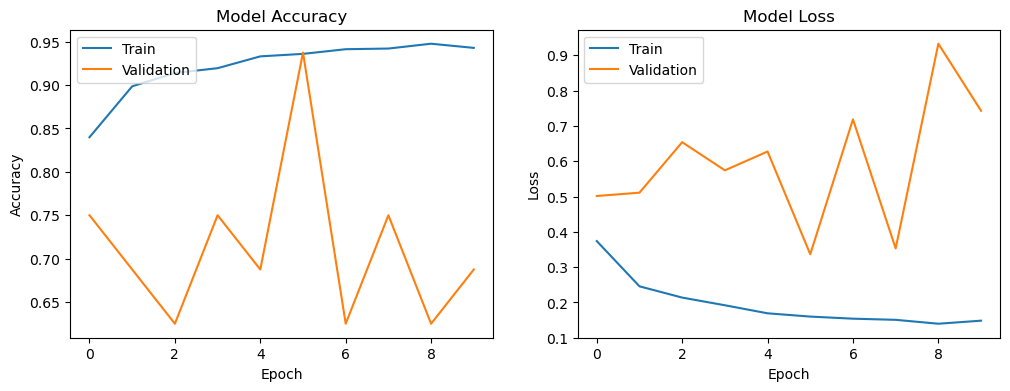

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


SAVING THE MODEL AND PRINTING ITS SUMMARY

In [7]:
# Save model to file
# Architecture of the model, allowing to reuse trained models
# Weights of the model
# Training configuration (loss, optimizer)
# State of the optimizer, allowing to resume training exactly where you left off
model.save('pneumonia_detection_model.h5')
model.summary()
model.weights
model.optimizer
#Loading the saved model
model = load_model('pneumonia_detection_model.h5')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

## STEP 7: CONFUSION MATRIX AND CLASSIFICATION REPORT

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step


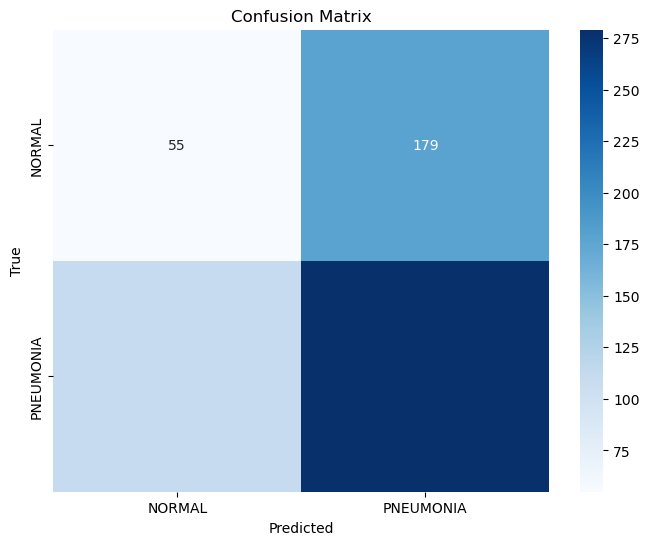

              precision    recall  f1-score   support

      NORMAL       0.33      0.24      0.28       234
   PNEUMONIA       0.61      0.72      0.66       390

    accuracy                           0.54       624
   macro avg       0.47      0.48      0.47       624
weighted avg       0.50      0.54      0.51       624



In [8]:
# import seaborn as sns
# Predict classes for the entire test set
y_pred = model.predict(test_set, steps=test_set.samples // test_set.batch_size + 1)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()  # Flatten the array to match the shape of y_true

# Get true labels
y_true = test_set.classes

# Ensure predictions and true labels have the same length
assert len(y_true) == len(y_pred_classes), "Mismatch between number of true labels and predictions."

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_set.class_indices.keys(), 
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys()))

## STEP 8: CALCULATION OF ACCURACY AND F1 SCORE

In [9]:
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f"Test Accuracy: {test_accuracy}")

# Get predictions from the model
test_set.reset()  # Reset the test set to the start
predictions = model.predict(test_set, steps=len(test_set))
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Get true labels
true_labels = test_set.classes  # True labels

# Calculate F1 score
f1 = f1_score(true_labels, predictions, average='binary')
print(f"F1 Score: {f1}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.8677 - loss: 0.3695
Test Accuracy: 0.8717948794364929
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step
F1 Score: 0.669811320754717


## STEP 9: PREDICTION OF PNEUMONIA OR NOT

In [10]:
test_image = image.load_img('C:\\Users\\Tanish Reddy\\Desktop\\sample.jpg', 
                            target_size = (64, 64))
# Add a 3rd Color dimension to match Model expectation
test_image = image.img_to_array(test_image)
# Add one more dimension to beginning of image array so 'Predict' function can receive it (corresponds to Batch, even if only one batch)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# We now need to pull up the mapping between 0/1 and normal/pneumonia
training_set.class_indices
# Map is 2D so check the first row, first column value
if result[0][0] == 1:
    prediction = 'pneumonia'
else:
    prediction = 'normal'
# Print result
print("The model class indices are:", training_set.class_indices)
print("\nPrediction: " + prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
The model class indices are: {'NORMAL': 0, 'PNEUMONIA': 1}

Prediction: normal


## SUMMARY OF WHAT I HAVE LEARNED FROM THE WHOLE COURSE:

- I have gained a lot of self-confidence when it comes to programming.
- I learned how to debug my code and use platforms like Stack Overflow to solve problems.
- Learning more about programming was the course's major goal, and I’ve achieved that.
- I am now certain that I will pursue Computer Science as my future major.
- Professor JoJo taught us how to code, find solutions, and seek help even when he is not present, which will be very helpful for us in the future(after course completion).

## MY PYTHON LEARNING EXPERIENCE

Working with Professor JoJo and Professor Kevin has been an amazing experience. Their guidance and support have been incredibly helpful in deepening my understanding of Python. I used to be nervous about my Python skills, but this course has given me a clearer idea of my abilities and introduced me to new parts of the language. Python is such a broad and exciting topic, and I’m thrilled to keep learning and exploring it.

Thanks to the excellent teaching and patience of Professors JoJo and Kevin, I now feel confident in my Python skills. If anyone asks if I know Python, I can proudly say, “Yes, I do!” I also want to give a special thanks to all my classmates for being there with me throughout the course.

Thank you, everyone!